#### **`Logit Transformation:`**

In [8]:
import pandas as pd
import numpy as np
from scipy.special import logit 

In [14]:
df=pd.read_csv("2022 MLB Player Stats - Batting.csv",encoding='latin1',sep=';')

In [15]:
df.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,0.280,0.324,0.604,76,92,5,9,2,2,0
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,0.285,0.320,0.605,77,40,4,6,2,2,0
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,0.276,0.327,0.603,75,52,1,3,0,0,0
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,...,0.000,0.000,0.000,0,0,0,0,0,0,0
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,...,0.000,0.000,0.000,0,0,0,0,0,0,0


In [33]:
df["BA"].max(), df["BA"].min()

(0.75, 0.0)

<Axes: >

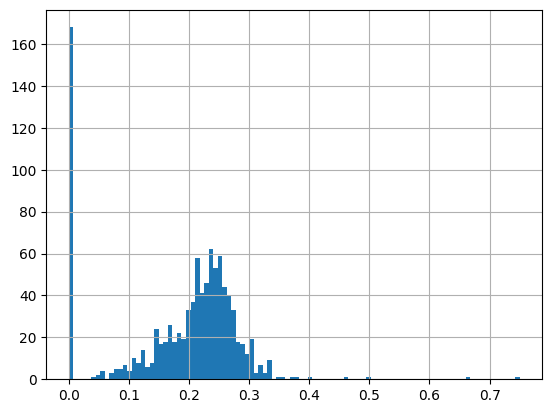

In [16]:
df["BA"].hist(bins=100)

In [25]:
df["BA-logited"]=df["BA"].apply(lambda x: logit(x))

In [29]:
import seaborn as sns

#### I had here some -inf values so I could not draw a hist using Pandas So I did it using seaborn

<Axes: xlabel='BA-logited', ylabel='Count'>

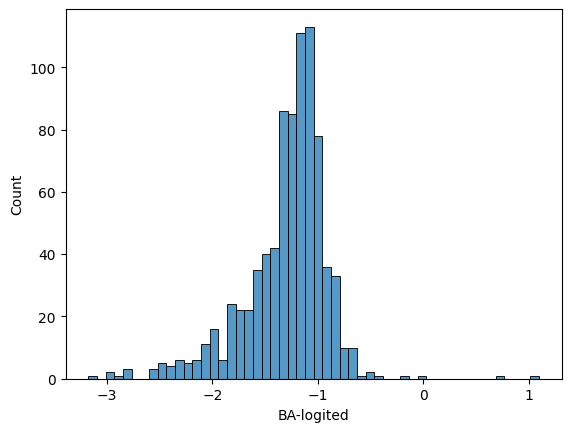

In [30]:
sns.histplot(df["BA-logited"])

In [31]:
# Lets solve the -inf problem:
# Lets Use MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler(feature_range=(0.001,0.999 ))
df["BA_Scaled"]=scaler.fit_transform(df[["BA"]])
###### Dont Forge [[]]

In [38]:
df["BA_Scaled"]=logit(df["BA_Scaled"])

<Axes: >

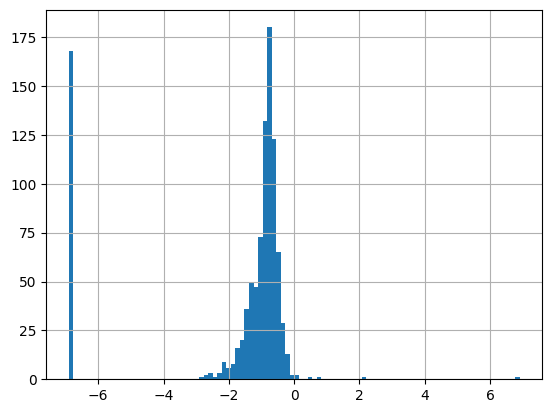

In [39]:
df["BA_Scaled"].hist(bins=100)